# Python + 酒田五法

ref:  
ローソク足分析手法「酒田五法」をPythonで実装する方法  
http://www.algo-fx-blog.com/sakata-candle-python/

## Step2 ライブラリーのインポート

In [1]:
# ライブラリのインポート
import pandas as pd
import numpy as np
 
# ローソク足描写
import matplotlib.pyplot as plt
import mplfinance as mpf
%matplotlib inline 

In [2]:
# データの読み込み
df = pd.read_csv("usd_10min_api.csv",index_col=1,parse_dates=True)

In [3]:
df.head(2)

,Unnamed: 0,close,open,high,low,volume
time,,,,,,
2018-03-01 15:40:00,0,106.792,106.817,106.817,106.777,87
2018-03-01 15:50:00,1,106.766,106.796,106.796,106.738,111


In [4]:
# 不要なカラムを削除
del df['Unnamed: 0']

In [5]:
df.head(2)

,close,open,high,low,volume
time,,,,,
2018-03-01 15:40:00,106.792,106.817,106.817,106.777,87
2018-03-01 15:50:00,106.766,106.796,106.796,106.738,111


In [6]:
df = df[['open','close','high','low','volume']]
df.head(2)

,open,close,high,low,volume
time,,,,,
2018-03-01 15:40:00,106.817,106.792,106.817,106.777,87
2018-03-01 15:50:00,106.796,106.766,106.796,106.738,111


In [7]:
df.index.name = 'Date'# 必須
df = df.rename(columns={'close': 'Close', 'open': 'Open', 'high': 'High', 'low': 'Low', 'volume': 'Volume'})# 必須
df.head(2)

,Open,Close,High,Low,Volume
Date,,,,,
2018-03-01 15:40:00,106.817,106.792,106.817,106.777,87
2018-03-01 15:50:00,106.796,106.766,106.796,106.738,111


In [8]:
df.tail(2)

,Open,Close,High,Low,Volume
Date,,,,,
2018-08-10 16:00:00,111.012,110.915,111.018,110.909,492
2018-08-10 16:10:00,110.913,110.773,110.927,110.692,880


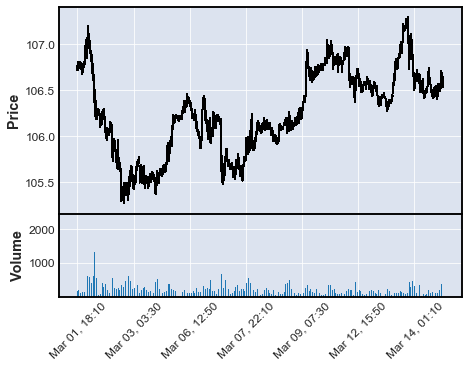

In [9]:
df_mini = df.loc['2018-03-01 18:10':'2018-03-14 18:20',:]
mpf.plot(df_mini,volume=True)#,type='candle' ,mav=(7,12))

## step3 データの前処理

In [10]:
# 終値を10〜30分ずらす
df['c1'] = df['Close'].shift(1)#最小単位が１０分なので１ずらすと10分ずれる
df['c2'] = df['Close'].shift(2)
df['c3'] = df['Close'].shift(3)

In [11]:
# 始値を10〜30分ずらす
df['o1'] = df['Open'].shift(1)
df['o2'] = df['Open'].shift(2)
df['o3'] = df['Open'].shift(3)

In [12]:
df.head()

,Open,Close,High,Low,Volume,c1,c2,c3,o1,o2,o3
Date,,,,,,,,,,,
2018-03-01 15:40:00,106.817,106.792,106.817,106.777,87,NaN,NaN,NaN,NaN,NaN,NaN
2018-03-01 15:50:00,106.796,106.766,106.796,106.738,111,106.792,NaN,NaN,106.817,NaN,NaN
2018-03-01 16:00:00,106.769,106.774,106.822,106.762,232,106.766,106.792,NaN,106.796,106.817,NaN
2018-03-01 16:10:00,106.777,106.815,106.828,106.765,154,106.774,106.766,106.792,106.769,106.796,106.817
2018-03-01 16:20:00,106.813,106.844,106.864,106.809,207,106.815,106.774,106.766,106.777,106.769,106.796


In [13]:
# カラムの並び替えと削除
df = df[[
    'Close', 'c1', 'c2', 'c3', 
    'Open', 'o1', 'o2', 'o3','High', 'Low','Volume'
]]

df.head()

,Close,c1,c2,c3,Open,o1,o2,o3,High,Low,Volume
Date,,,,,,,,,,,
2018-03-01 15:40:00,106.792,NaN,NaN,NaN,106.817,NaN,NaN,NaN,106.817,106.777,87
2018-03-01 15:50:00,106.766,106.792,NaN,NaN,106.796,106.817,NaN,NaN,106.796,106.738,111
2018-03-01 16:00:00,106.774,106.766,106.792,NaN,106.769,106.796,106.817,NaN,106.822,106.762,232
2018-03-01 16:10:00,106.815,106.774,106.766,106.792,106.777,106.769,106.796,106.817,106.828,106.765,154
2018-03-01 16:20:00,106.844,106.815,106.774,106.766,106.813,106.777,106.769,106.796,106.864,106.809,207


## STEP4 安値圏と高値圏の検出方法

In [14]:
# ボリンジャーバンドの計算
df['mean'] = df['Close'].rolling(window=20).mean()
df['std'] = df['Close'].rolling(window=20).std()
df['upper'] = df['mean'] + (df['std'] * 2)
df['lower'] = df['mean'] - (df['std'] * 2) 

In [15]:
# 最初の19行を削除してインデックスをリセット
df = df[19:]
#df = df.reset_index(drop=True)
df.head()

,Close,c1,c2,c3,Open,o1,o2,o3,High,Low,Volume,mean,std,upper,lower
Date,,,,,,,,,,,,,,,
2018-03-01 18:50:00,106.769,106.741,106.763,106.787,106.740,106.761,106.790,106.760,106.775,106.732,186,106.79460,0.041563,106.877727,106.711473
2018-03-01 19:00:00,106.792,106.769,106.741,106.763,106.767,106.740,106.761,106.790,106.816,106.753,192,106.79460,0.041563,106.877727,106.711473
2018-03-01 19:10:00,106.775,106.792,106.769,106.741,106.789,106.767,106.740,106.761,106.820,106.774,145,106.79505,0.041285,106.877620,106.712480
2018-03-01 19:20:00,106.780,106.775,106.792,106.769,106.773,106.789,106.767,106.740,106.808,106.744,157,106.79535,0.041146,106.877642,106.713058
2018-03-01 19:30:00,106.790,106.780,106.775,106.792,106.783,106.773,106.789,106.767,106.816,106.777,147,106.79410,0.040896,106.875893,106.712307


In [16]:
df = df.rename(columns={'upper':'UpperB','lower':'LowerB'})# 必須
df.head()
#mpf.plot(df,type='candle')

,Close,c1,c2,c3,Open,o1,o2,o3,High,Low,Volume,mean,std,UpperB,LowerB
Date,,,,,,,,,,,,,,,
2018-03-01 18:50:00,106.769,106.741,106.763,106.787,106.740,106.761,106.790,106.760,106.775,106.732,186,106.79460,0.041563,106.877727,106.711473
2018-03-01 19:00:00,106.792,106.769,106.741,106.763,106.767,106.740,106.761,106.790,106.816,106.753,192,106.79460,0.041563,106.877727,106.711473
2018-03-01 19:10:00,106.775,106.792,106.769,106.741,106.789,106.767,106.740,106.761,106.820,106.774,145,106.79505,0.041285,106.877620,106.712480
2018-03-01 19:20:00,106.780,106.775,106.792,106.769,106.773,106.789,106.767,106.740,106.808,106.744,157,106.79535,0.041146,106.877642,106.713058
2018-03-01 19:30:00,106.790,106.780,106.775,106.792,106.783,106.773,106.789,106.767,106.816,106.777,147,106.79410,0.040896,106.875893,106.712307


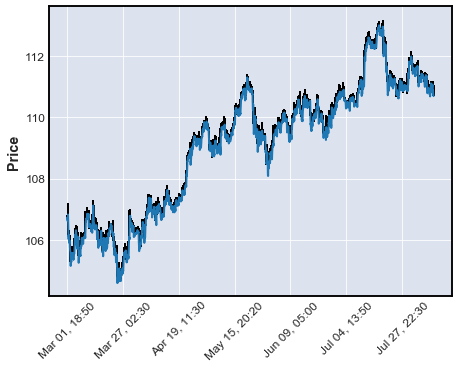

In [17]:
apdict = mpf.make_addplot(df['LowerB'])
mpf.plot(df,addplot=apdict)

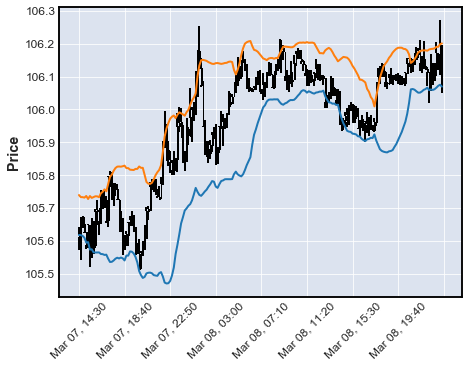

In [18]:
df_mini = df[550:750]
apdict_mini = mpf.make_addplot(df_mini[['LowerB','UpperB']])
mpf.plot(df_mini,type='candle',addplot=apdict_mini)

## STEP5 酒田五法 赤三兵を検出する

今回は安値圏で陽線が三つ並ぶ「赤三兵＝買いシグナル」を検出します。

三兵の検出ルールとして2つ考えましょう。赤三兵の一つ目のルールが「安値圏」です。今回はシンプルに赤三兵の最初のローソク足の終値がボリンジャーバンドの下線よりも低いというルールとします。

ボリンジャーバンドの下線よりも低い、つまり相場が安値圏に入っている可能性がある、という考えです。ではPythonでそのルールを実装してあげましょう。

In [19]:
# ルールその1 C3 < LowerB
df['rule_1'] = 0
rule_1_mask = df['c3'] < df['LowerB']
df['rule_1'][rule_1_mask] = 1

/Users/koz/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


ルールその1として、赤三兵の最初のローソク足の終値（C3）がボリンジャーバンドの下線（lower）よりも値が低ければ「1」、高ければ「0」となるように算出しました。

続いて、ルールその2です。赤三兵は「3つの陽線が出現する」という大事なルールがあります。陽線というのは、データで表すと「始値 – 終値 = 負の数」です。では、ルール2もデータから算出してみましょう。

In [20]:
# ルールその2
df['rule_2'] = 0
rule_2_mask = (df['Open'] - df['Close'] < 0) & (df['o1'] - df['c1'] < 0) & (df['o2'] - df['c2'] < 0)
df['rule_2'][rule_2_mask] = 1

/Users/koz/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


上のコードでは20分前、10分前、現在の10分足が続けて三連続で陽線であれば「1」、一つでも条件が外れたら「０」となります。

## STEP6 検出した赤三兵をローソク足チャートで確認

前のステップで赤三兵を算出する2つのルールを作ってデータ解析を行いました。では、実際に赤三兵が算出できているのかローソク足チャートを使って確認してみましょう。

データからルール1とルール2が該当するレコードを探します。つまり「安値圏（ボリンジャーバンドの下線より下）で3つの陽線が出現する箇所」です。

In [21]:
# ルール1とルール2が該当するレコードを探す
df[(df['rule_1'] == 1.0) & (df['rule_2'] == 1.0)][0:5]

,Close,c1,c2,c3,Open,o1,o2,o3,High,Low,Volume,mean,std,UpperB,LowerB,rule_1,rule_2
Date,,,,,,,,,,,,,,,,,
2018-03-15 14:40:00,105.935,105.893,105.850,105.811,105.891,105.853,105.809,105.957,105.953,105.873,169,105.97235,0.061012,106.094374,105.850326,1,1
2018-03-16 08:20:00,106.347,106.340,106.314,106.298,106.343,106.315,106.300,106.333,106.376,106.343,60,106.33935,0.020374,106.380097,106.298603,1,1
2018-03-20 09:10:00,106.062,106.055,106.025,105.946,106.053,106.026,105.948,105.978,106.085,106.013,321,106.03850,0.032615,106.103730,105.973270,1,1
2018-03-31 02:00:00,106.230,106.224,106.221,106.207,106.226,106.223,106.209,106.228,106.231,106.212,23,106.22465,0.006983,106.238617,106.210683,1,1
2018-04-05 15:00:00,106.924,106.908,106.877,106.863,106.910,106.880,106.861,106.922,106.924,106.877,178,106.93765,0.034355,107.006359,106.868941,1,1


In [22]:
df[1800:1840].head()

,Close,c1,c2,c3,Open,o1,o2,o3,High,Low,Volume,mean,std,UpperB,LowerB,rule_1,rule_2
Date,,,,,,,,,,,,,,,,,
2018-03-20 05:50:00,106.123,106.092,106.113,106.132,106.094,106.115,106.130,106.158,106.123,106.076,76,106.04220,0.098293,106.238786,105.845614,0,0
2018-03-20 06:00:00,106.041,106.123,106.092,106.113,106.123,106.094,106.115,106.130,106.123,106.008,179,106.05110,0.088815,106.228730,105.873470,0,0
2018-03-20 06:10:00,106.061,106.041,106.123,106.092,106.043,106.123,106.094,106.115,106.066,106.043,40,106.05935,0.080966,106.221282,105.897418,0,0
2018-03-20 06:20:00,106.054,106.061,106.041,106.123,106.060,106.043,106.123,106.094,106.085,106.048,106,106.06125,0.080339,106.221927,105.900573,0,0
2018-03-20 06:30:00,106.053,106.054,106.061,106.041,106.054,106.060,106.043,106.123,106.080,106.011,129,106.06345,0.079430,106.222310,105.904590,0,0


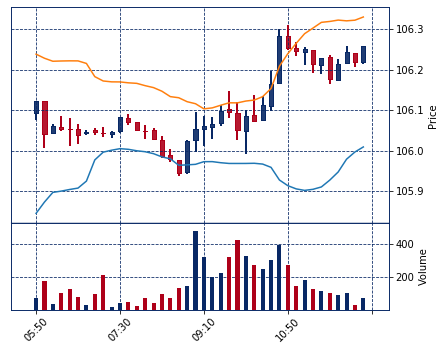

In [23]:
df_mini = df[1800:1840]
apdict_mini = mpf.make_addplot(df_mini[['LowerB','UpperB']])
kwargs = dict(type='candle',volume=True,figratio=(10,8),figscale=0.75)
mpf.plot(df_mini,addplot=apdict_mini,**kwargs,style='starsandstripes')